<a href="https://colab.research.google.com/github/GiX7000/top-10-ml-algorithms-from-scratch/blob/main/01_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of K-Nearest Neighbors classifier

We will see how to implement [KNN](https://www.youtube.com/watch?v=0p0o5cmgLdE) algorithm, which is one of the simplest in ML, from scratch in python.

In [1]:
# import useful libraries
import numpy as np
from collections import Counter

from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 1. Download the [iris dataset](https://archive.ics.uci.edu/dataset/53/iris), create train and test sets and visualize.

In [2]:
# download iris dataset
iris = datasets.load_iris()
X, y = iris.data, iris.target

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# let's see some things about the data
print(X_train.shape, X_train.dtype, X_train[0], y_train.shape, y_train.dtype, y_train[0])
print(X_test.shape, X_test.dtype, y_test.shape, y_test.dtype, y_test[0])
print(f"Classes of the datastet are: {iris.target_names}")

(120, 4) float64 [5.1 2.5 3.  1.1] (120,) int64 1
(30, 4) float64 (30,) int64 1
Classes of the datastet are: ['setosa' 'versicolor' 'virginica']


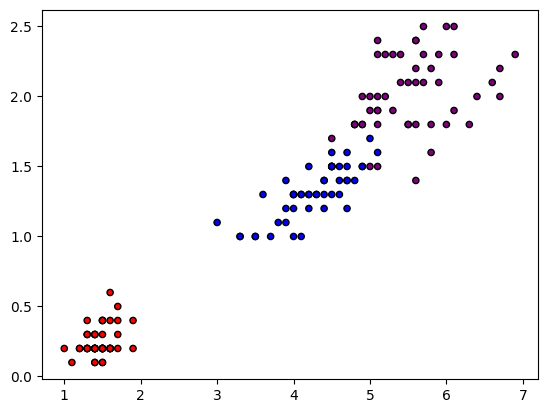

In [3]:
# plot how the training data look like
plt.figure()
cmap = ListedColormap(['red','blue','purple'])
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20) # plot with regard to 2/4 features
plt.show()

## 2. Create the KNN model.

In [4]:
# calculate L2 distance
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

# create knn algorithm as a class
class KNN:
  def __init__(self, k=2):
    self.k = k

  # train function that just memorizes the inputs
  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  # predictions of all points
  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  # prediction per point
  def _predict(self, x):
    # 1. compute the euclidean distance between the given point and all other points in the training set
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

    # 2. sort the distances and get the k closest of them
    k_indices = np.argsort(distances)[:self.k]

    # 3. find the labels of these k closest distances
    k_nearest_labels = [self.y_train[i] for i in k_indices]

    # 4. find the majority of labels around the point(get the most common labels)
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

    # an alternative code for 4 above for the majority of votes
    #most_common = Counter(k_nearest_labels).most_common()
    #return most_common[0][0]

## 3. Train, predict and evaluate a KNN model for k=5.

In [5]:
# create a knn instance for k=5
clf = KNN(k=5)

# 'train'(=memorize the train set) the clf
clf.fit(X_train, y_train)

In [6]:
# make predictions on test set
predictions = clf.predict(X_test)

# Print the predictions and the actual labels
print("Predictions:", np.array(predictions))
print("Actual Labels:", y_test)

Predictions: [1 2 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]
Actual Labels: [1 1 2 0 1 0 0 0 1 2 1 0 2 1 0 1 2 0 2 1 1 1 1 1 2 0 2 1 2 0]


In [7]:
# compute the accuracy
acc = np.sum(predictions == y_test) / len(y_test)

# and print the knn's accuracy
print(acc)

0.9666666666666667


We get an accuracy of 96,6% and that's a very good accuracy score for this quick implementation of K-Neirest_Neighbour algorithm.

## 4. Compare with KNeighborsClassifier from scikit-learn library.

In [8]:
# let's compare now with the accuracy that sklearn gives us
from sklearn.neighbors import KNeighborsClassifier

clf_sklearn = KNeighborsClassifier(n_neighbors=5)
clf_sklearn.fit(X_train, y_train)
sklearn_predictions = clf_sklearn.predict(X_test)

sklearn_acc = np.sum(sklearn_predictions == y_test) / len(y_test)
print(sklearn_acc)

0.9666666666666667


We  get the same accuracy as the one that [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) from scikit-learn library gives us.